In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # just for fancy plot styling
%matplotlib inline

# ELEC2104 Lab 0

## Objective

To introduce the equipment by investigating frequency dependence on the input-output characteristics of RC circuits.

## Background

The input voltage $V_in$ is usually represented as a periodic function of time, i.e. a sine wave of the form $V_in = V_0cos(\omega t)$ (note $\omega = 2\pi f$). A phasor can be used to describe this input, which is a complex number with magnitude $V_0$ and angle as the phase offset. The output phasor is $V_out$. In a steady state, the output is sinusoidal with the same angular frequency, but a possibly different amplitude and phase. Two-port circuits can be described by a **transfer function**, $H(\omega), which is defined as the ratio of the output phasor voltage to the input phasor voltage, as a function of frequency. 

<img src="fig1.png" width=60%%>

For the above circuit we have: 

$$ H(j\omega) = \frac {1} {1 + j\omega RC} $$

$H(\omega)$ is also a complex quantity. The magnitude of $H$ gives the ratio of amplitudes, and the angle gives the phase difference between the input and the output. For the above circuit:

$$ |H(j\omega)| = \frac {1} {\sqrt {1 + (\frac {\omega} {\omega_0})^2}} $$

$$ \angle H(j\omega) = -tan^{-1}(\frac {\omega} {\omega_0}) $$

.

## Equipment and Components Used

 - Tektronix MSO 2012 Oscilloscope
 - Rigol DG2041A Function Generator
 - 10 kOhm resistor
 - 1 nF capacitor

## Experimental Work

1. Connect a 10 kΩ resistor and a (non-polarized) 0.001µF capacitor in series with the function generator, making sure that your oscilloscope ground and the function generator ground are connected together as shown in Fig.5. 
<br>
<img src="fig2.png" width=50%>
<br>

2. Set the function generator to output a sine wave with 2 Vpp and no DC offset and measure by the oscilloscope.
<br><br>

3. Measure and record the amplitude of the voltage across the capacitor (Fig.5(a)) versus frequency. Calculate the voltage gain in decibels by $A_v=20log_{10}(V_{out}/V_{in})$. Plot Av versus frequency on semi-log scale and identify the 3dB cut off frequency. Is it close to the calculated cut-off frequency?
<br><br>
Note: cut-off frequency for an RC low-pass filter is: $$ f_c = \frac {1} {2\pi RC} $$
<br><br>

In [ ]:
lowpass_data = {}
lowpass_data['frequency'] = np.array([ 1e+3, 10e+3, 12e+3, 14e+3, 16e+3, 30e+3, 100e+3 ])   # Hz

# Record low-pass V_out and V_in
lowpass_data['V_out']   = np.array([ , , , , , ,  ])
lowpass_data['V_in']    = np.array([ , , , , , ,  ])

# calculate voltage gain
lowpass_data['A_v'] = 20 * np.log10(lowpass_data['V_out'] / lowpass_data['V_in'])

# plot voltage gain against log-scaled frequency
fig = plt.figure(figsize=(12, 8))

plt.title('Low-Pass Voltage Gain vs Frequency', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Voltage Gain (dB)', fontsize=16)
plt.semilogx(lowpass_data['frequency'], lowpass_data['A_v'])

<ol start="4">
  <li>Measure the phase shift of Vout with respect to Vin at different frequencies. Plot the phase response on linear scale. What is the phase shift corresponding to the cut-off frequency? Use the input signal as a reference (Vin has a phase of zero degrees).</li><br>
  </ol>

In [ ]:
# Record low-pass phase difference (ang(V_out) - ang(V_in)) in DEGREES
lowpass_data['phase'] = np.array([ , , , , , ,  ])

plt.figure(figsize=(12, 8))
plt.title('Low-Pass Phase Shift vs Frequency')
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Voltage Gain (dB)', fontsize=16)
plt.plot(lowpass_data['frequency'], lowpass_data['phase'])

<ol start='5'>
  <li>Apply a square wave input from the function generator to the low-pass filter. Vary the frequency and observe the effects of the filter circuit on the output. Qualitatively draw waveforms at f = 1 kHz and 10 kHz of the square wave input and the output. Explain the results in terms of RC circuit transient response.</li><br>
</ol>

For the capacitor we have $i = C\frac {dv_{out}} {dt}$, so $\frac {dv_{out}} {dt} = \frac {1} {C} i = \frac {v_R} {RC}$. But by KVL, $v_R = v_{in} - v_{out}$, so we get:

$$ \frac {dv_{out}} {dt} = \frac {v_{in} - v_{out}} {RC} $$

This is a first order ODE which can be solved numerically. Note that the capacitance value used below has been increased by several orders of magnitude so that the charging/discharging effect can be seen:

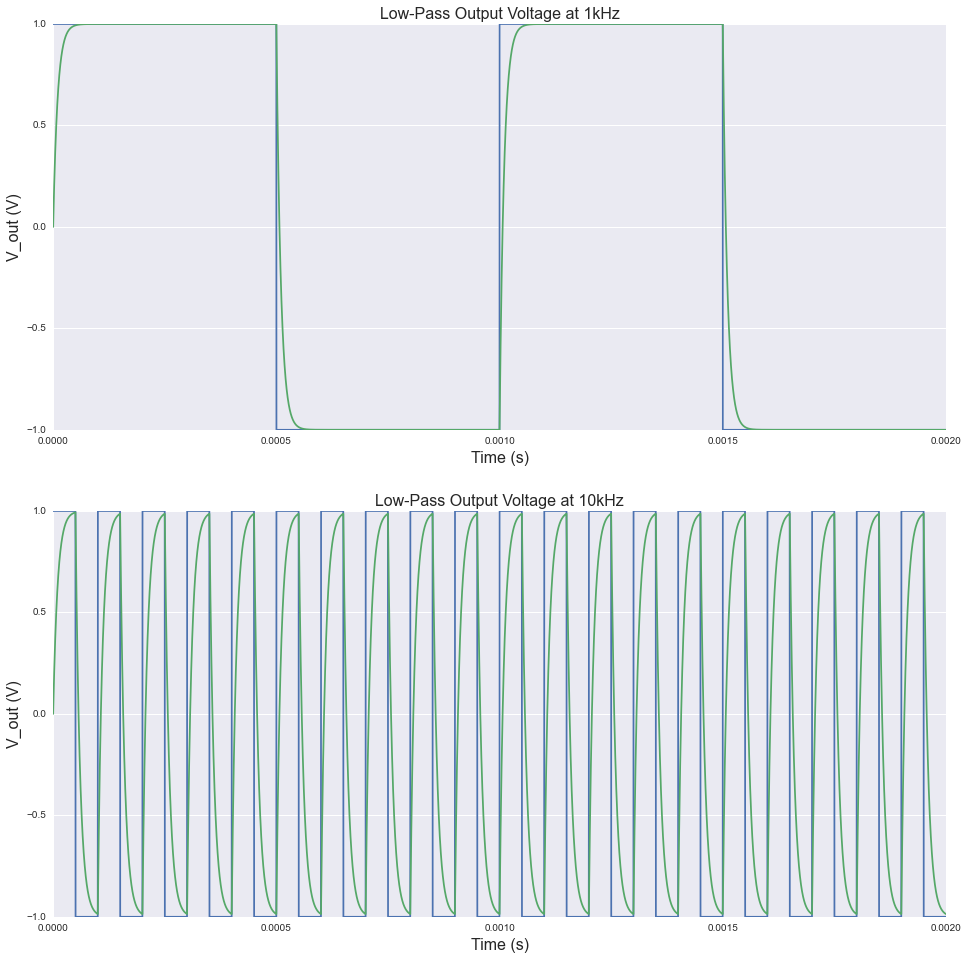

In [2]:
R = 10e+3   # Ohms
C = 1e-9   # F -- This capacitance value is much larger than what it actually is!

# time step: 
dt = 1e-9 # one picosecond timestep (for numerical stability)

def lowpass_square_response(square_freq, run_for):
    
    i = 0   # step
    
    # compute number of steps:
    n = int(run_for / dt)
    
    t = np.linspace(0, (n - 1) * dt, n)
    
    v_in = signal.square(2 * np.pi * square_freq * t)
#     plt.plot(t, v_in)
    
    v_out = np.zeros(n)
    v_out[0] = 0
    
    for i in range(n - 1):
        dv_out = ( (v_in[i] - v_out[i]) / (R*C) ) * dt
        v_out[i + 1] = v_out[i] + dv_out
    
    return (t, v_out, v_in)

# calculate 2 ms of data for 1 kHz and 10 kHz
t_1kHz, v_out_1kHz, v_in_1kHz = lowpass_square_response(1e+3, 0.002)
t_10kHz, v_out_10kHz, v_in_10kHz = lowpass_square_response(10e+3, 0.002)

# subsample the data for quicker plotting
t_1kHz = t_1kHz[0::100]
v_out_1kHz = v_out_1kHz[0::100]
v_in_1kHz = v_in_1kHz[0::100]
t_10kHz = t_10kHz[0::100]
v_out_10kHz = v_out_10kHz[0::100]
v_in_10kHz = v_in_10kHz[0::100]

plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
plt.title('Low-Pass Output Voltage at 1kHz', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('V_out (V)', fontsize=16)
plt.plot(t_1kHz, v_in_1kHz)
plt.plot(t_1kHz, v_out_1kHz)
plt.subplot(2, 1, 2)
plt.title('Low-Pass Output Voltage at 10kHz', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('V_out (V)', fontsize=16)
plt.plot(t_10kHz, v_in_10kHz)
plt.plot(t_10kHz, v_out_10kHz)
plt.show()

<ol start='6'>
  <li>Now, repeat the process for the RC high pass filter, connected as shown:</li>
  <img src="fig3.png" width=40%><br>
  <li>Set the function generator to output a sine wave of 2 Vpp and no DC offset. Measure and record $V_out$ and $V_in$ from the oscilloscope. Calculate the voltage gain as before, and plot it versus frequency on semi-log scale. Indicate the 3-dB point on your graph.</li>
</ol>


In [ ]:
# Note the different test frequencies for the high pass data!
highpass_data = {}
highpass_data['frequency'] = np.array([ 100, 1e+3, 12e+3, 14e+3, 16e+3, 20e+3, 100e+3 ])   # Hz

# Record high-pass V_out and V_in
highpass_data['V_out']   = np.array([ , , , , , ,  ])
highpass_data['V_in']    = np.array([ , , , , , ,  ])

# calculate voltage gain
highpass_data['A_v'] = 20 * np.log10(highpass_data['V_out'] / highpass_data['V_in'])

# plot voltage gain against log-scaled frequency
fig = plt.figure(figsize=(12, 8))

plt.title('High-Pass Voltage Gain vs Frequency', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Voltage Gain (dB)', fontsize=16)
plt.semilogx(highpass_data['frequency'], highpass_data['A_v'])

<ol start="8">
  <li>Measure the phase shift of Vout with respect to Vin at different frequencies. Plot the phase response on linear scale. What is the phase shift corresponding to the cut-off frequency? Use the input signal as a reference (Vin has a phase of zero degrees).</li><br>
  </ol>

In [ ]:
# Record low-pass phase difference (ang(V_out) - ang(V_in)) in DEGREES
highpass_data['phase'] = np.array([ , , , , , ,  ])

plt.figure(figsize=(12, 8))
plt.title('High-Pass Phase Shift vs Frequency')
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Voltage Gain (dB)', fontsize=16)
plt.plot(highpass_data['frequency'], highpass_data['phase'])

<ol start='5'>
  <li>Apply a square wave input from the function generator to the low-pass filter. Vary the frequency and observe the effects of the filter circuit on the output. Qualitatively draw waveforms at f = 1 kHz and 10 kHz of the square wave input and the output. Explain the results in terms of RC circuit transient response.</li><br>
</ol>

For the resistor we have $v_{out} = iR$ and for the capacitor we have $i = C \frac {dv_C} {dt}$. This gives:

$$ \frac {dv_C} {dt} = \frac {v_{out}} {RC} = \frac {v_{in} - v_C} {RC} $$

After solving the DE for $v_C$, use $v_{out} = v_{in} - v_C$. 

Again, the capacitance value used is much higher.

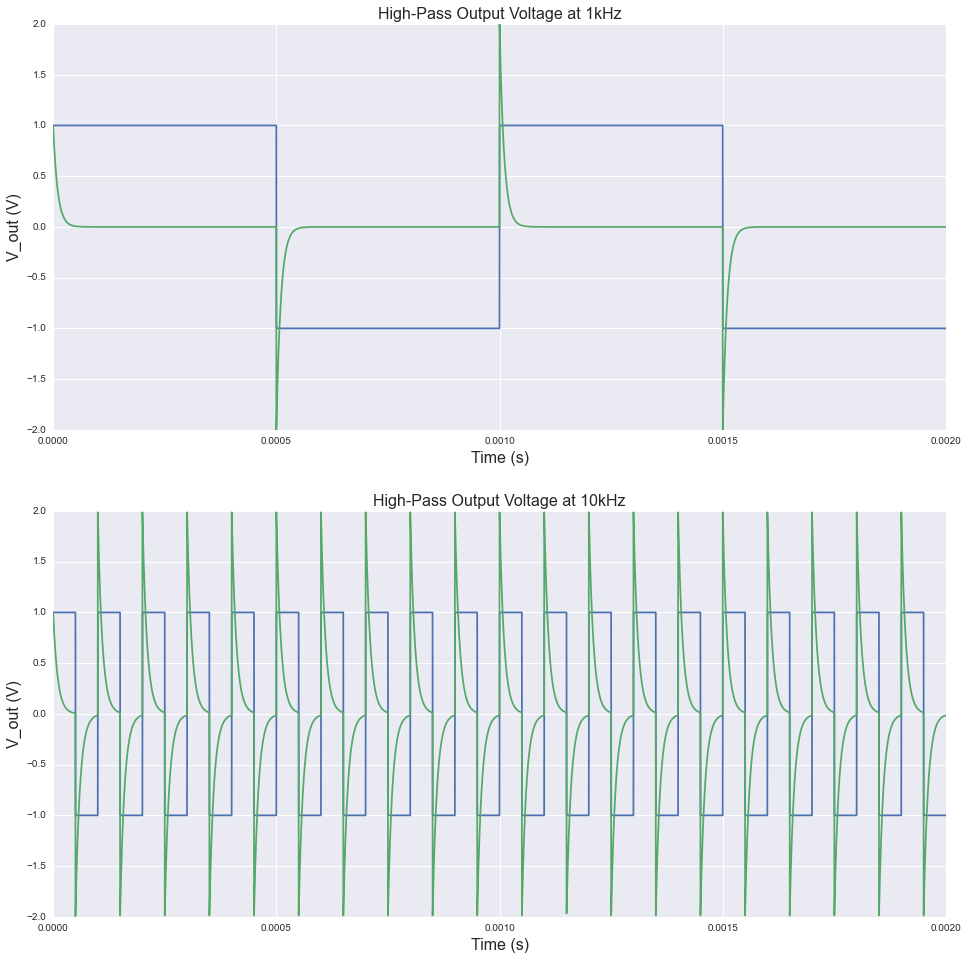

In [3]:
R = 10e+3   # Ohms
C = 1e-9   # F -- This capacitance value is much larger than what it actually is!

# time step: 
dt = 1e-9 # one picosecond timestep (for numerical stability)

def highpass_square_response(square_freq, run_for):
    
    i = 0   # step
    
    # compute number of steps:
    n = int(run_for / dt)
    
    t = np.linspace(0, (n - 1) * dt, n)
    
    v_in = signal.square(2 * np.pi * square_freq * t)
    
    v_C = np.zeros(n)
    
    for i in range(n - 1):
        dv_C = ( (v_in[i] - v_C[i]) / (R*C) ) * dt
        v_C[i + 1] = v_C[i] + dv_C
    
    return (t, v_in - v_C, v_in)

# calculate 2 ms of data for 1 kHz and 10 kHz
t_1kHz, v_out_1kHz, v_in_1kHz = highpass_square_response(1e+3, 0.002)
t_10kHz, v_out_10kHz, v_in_10kHz = highpass_square_response(10e+3, 0.002)

# subsample the data for quicker plotting
t_1kHz = t_1kHz[0::100]
v_out_1kHz = v_out_1kHz[0::100]
v_in_1kHz = v_in_1kHz[0::100]
t_10kHz = t_10kHz[0::100]
v_out_10kHz = v_out_10kHz[0::100]
v_in_10kHz = v_in_10kHz[0::100]

plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
plt.title('High-Pass Output Voltage at 1kHz', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('V_out (V)', fontsize=16)
plt.plot(t_1kHz, v_in_1kHz)
plt.plot(t_1kHz, v_out_1kHz)
plt.subplot(2, 1, 2)
plt.title('High-Pass Output Voltage at 10kHz', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('V_out (V)', fontsize=16)
plt.plot(t_10kHz, v_in_10kHz)
plt.plot(t_10kHz, v_out_10kHz)
plt.show()